In [1]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import joblib

In [3]:
df = pd.read_csv(r"C:\Users\이수진\GitHub\SERVER_WAYVI\ai-server\datasets\raw\workout_fitness_tracker_data.csv")

In [4]:
df

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,20,Other,173,59,Yoga,95,230,160,1330,12.83,Medium,10.0,1.9,3718,56,38.4,28.5,Neutral,Neutral
9996,9997,29,Female,171,71,HIIT,83,539,170,3236,9.74,Low,9.4,1.9,2752,72,38.4,28.5,Tired,Fatigued
9997,9998,47,Male,183,75,Running,89,886,114,10532,14.51,Medium,8.1,1.9,1572,73,38.4,28.5,Neutral,Fatigued
9998,9999,52,Male,170,97,HIIT,28,447,102,13690,1.43,Low,7.3,1.9,2172,84,38.4,28.5,Stressed,Fatigued


In [5]:
df['Mood Before Workout'].unique()

array(['Tired', 'Happy', 'Neutral', 'Stressed'], dtype=object)

In [6]:
df['Mood After Workout'].unique()

array(['Fatigued', 'Energized', 'Neutral'], dtype=object)

In [7]:
def map_overexertion(after):
    if after == "Fatigued":
        return 1
    else:
        return 0 

In [8]:
df['fatigue_label'] = df.apply(
    lambda row: map_overexertion(row['Mood After Workout']),
    axis=1
)

df

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,...,Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout,fatigue_label
0,1,39,Male,175,99,Cycling,79,384,112,8850,...,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued,1
1,2,36,Other,157,112,Cardio,73,612,168,2821,...,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized,0
2,3,25,Female,180,66,HIIT,27,540,133,18898,...,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued,1
3,4,56,Male,154,89,Cycling,39,672,118,14102,...,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral,0
4,5,53,Other,194,59,Strength,56,410,170,16518,...,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,20,Other,173,59,Yoga,95,230,160,1330,...,Medium,10.0,1.9,3718,56,38.4,28.5,Neutral,Neutral,0
9996,9997,29,Female,171,71,HIIT,83,539,170,3236,...,Low,9.4,1.9,2752,72,38.4,28.5,Tired,Fatigued,1
9997,9998,47,Male,183,75,Running,89,886,114,10532,...,Medium,8.1,1.9,1572,73,38.4,28.5,Neutral,Fatigued,1
9998,9999,52,Male,170,97,HIIT,28,447,102,13690,...,Low,7.3,1.9,2172,84,38.4,28.5,Stressed,Fatigued,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   10000 non-null  int64  
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Height (cm)               10000 non-null  int64  
 4   Weight (kg)               10000 non-null  int64  
 5   Workout Type              10000 non-null  object 
 6   Workout Duration (mins)   10000 non-null  int64  
 7   Calories Burned           10000 non-null  int64  
 8   Heart Rate (bpm)          10000 non-null  int64  
 9   Steps Taken               10000 non-null  int64  
 10  Distance (km)             10000 non-null  float64
 11  Workout Intensity         10000 non-null  object 
 12  Sleep Hours               10000 non-null  float64
 13  Water Intake (liters)     10000 non-null  float64
 14  Daily C

In [10]:
d=pd.DataFrame()

In [12]:
d["heartRate"] = df["Heart Rate (bpm)"]
d["stepCount"] = df["Steps Taken"]
d["activeEnergyBurned"] = df["Calories Burned"]
d["runningSpeed"] = df["Distance (km)"] / df["Workout Duration (mins)"]
d['fatigue_label'] = df['fatigue_label']

In [13]:
d

,heartRate,stepCount,activeEnergyBurned,runningSpeed,fatigue_label
0,112,8850,384,0.182785,1
1,168,2821,612,0.015068,0
2,133,18898,540,0.269630,1
3,118,14102,672,0.167949,0
4,170,16518,410,0.056607,0
...,...,...,...,...,...
9995,160,1330,230,0.135053,0
9996,170,3236,539,0.117349,1
9997,114,10532,886,0.163034,1
9998,102,13690,447,0.051071,1


In [35]:
d.describe()

,heartRate,stepCount,activeEnergyBurned,runningSpeed,fatigue_label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,129.526700,10455.496600,552.100800,0.181579,0.33210
std,28.874152,5486.423716,260.629908,0.192832,0.47099
min,80.000000,1000.000000,100.000000,0.004407,0.00000
25%,105.000000,5673.000000,325.000000,0.064850,0.00000
50%,130.000000,10434.500000,554.000000,0.121689,0.00000
75%,155.000000,15211.000000,776.000000,0.216613,1.00000
max,179.000000,19998.000000,999.000000,1.474000,1.00000


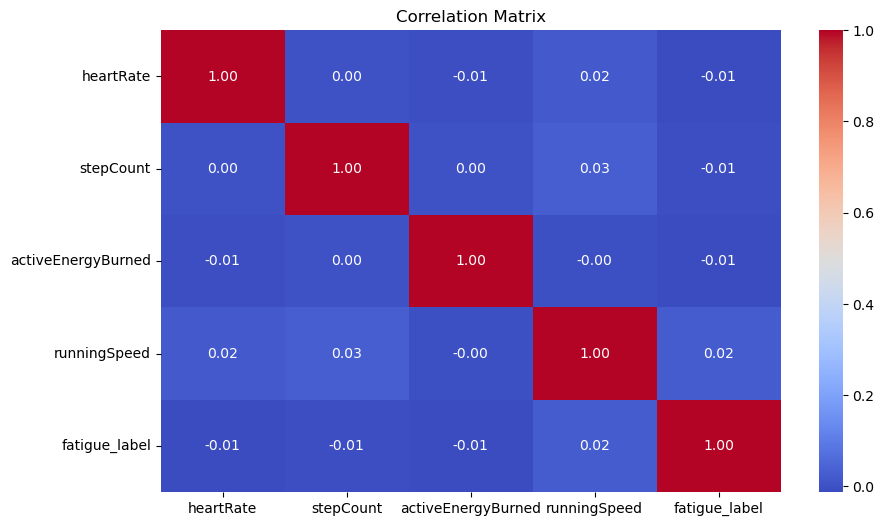

In [37]:
# 상관계수 계산
corr_matrix = d.corr()

# 히트맵으로 시각화
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


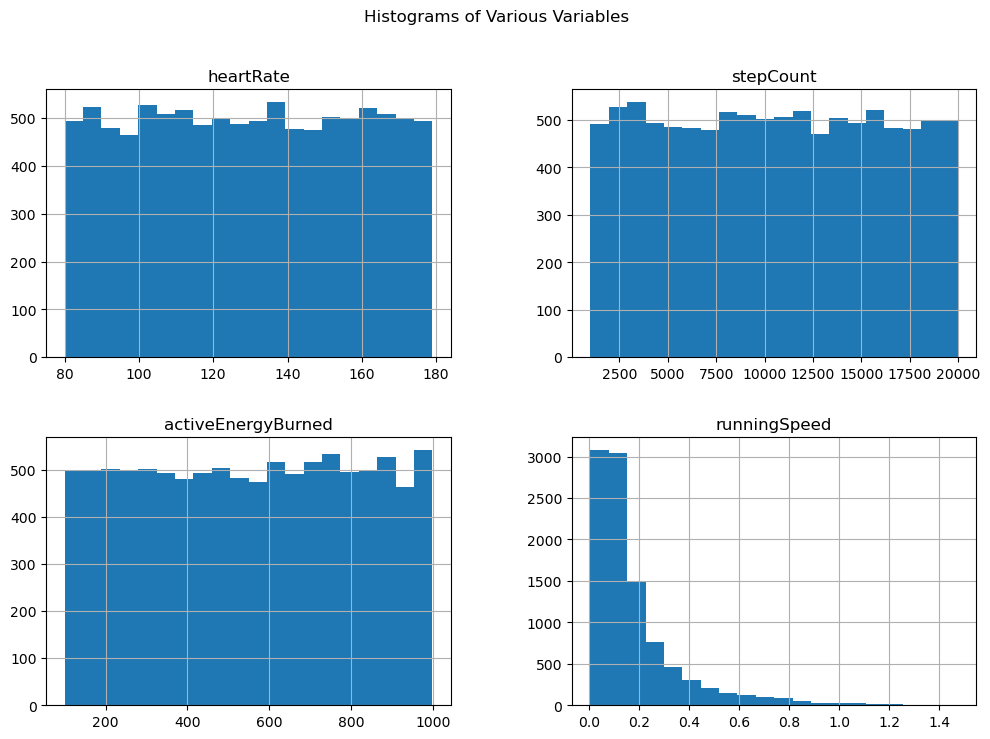

In [39]:
# 각 변수의 히스토그램
d[['heartRate', 'stepCount', 'activeEnergyBurned', 'runningSpeed']].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Various Variables')
plt.show()


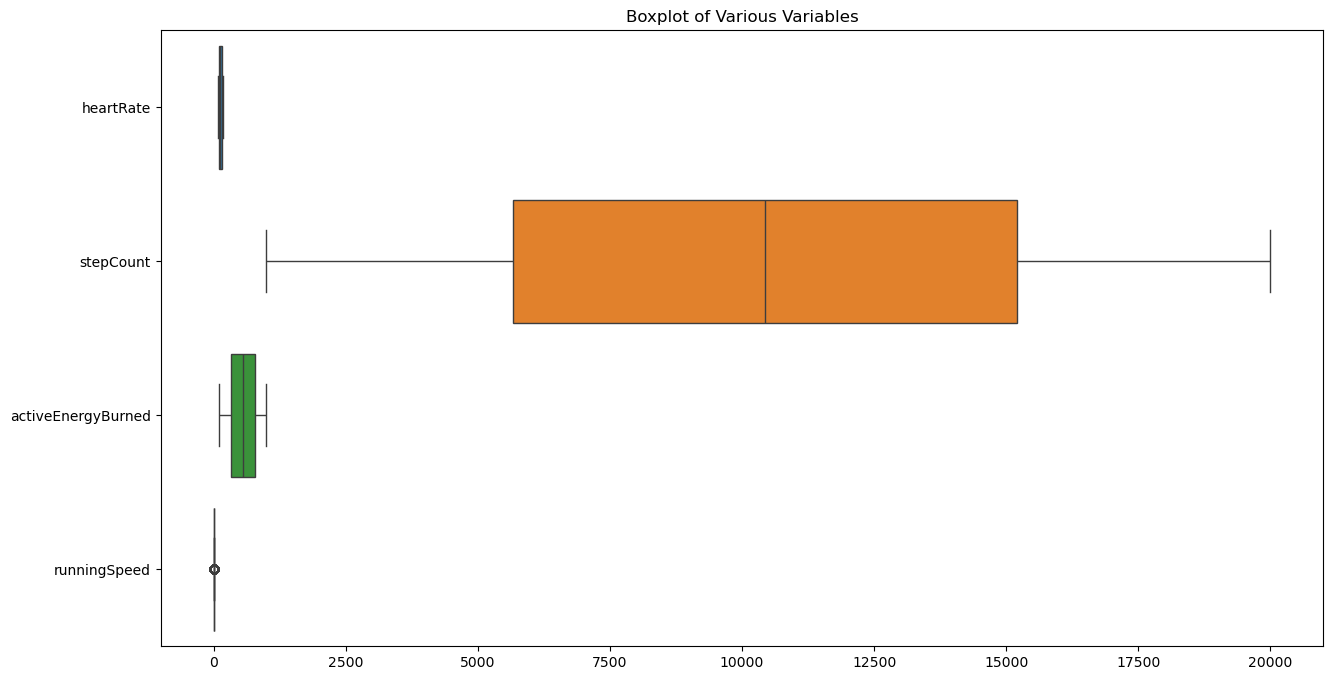

In [57]:
# 각 변수의 박스플롯
plt.figure(figsize=(15,8))
sns.boxplot(data=d[['heartRate', 'stepCount', 'activeEnergyBurned', 'runningSpeed']], orient='h')
plt.title('Boxplot of Various Variables')
plt.show()

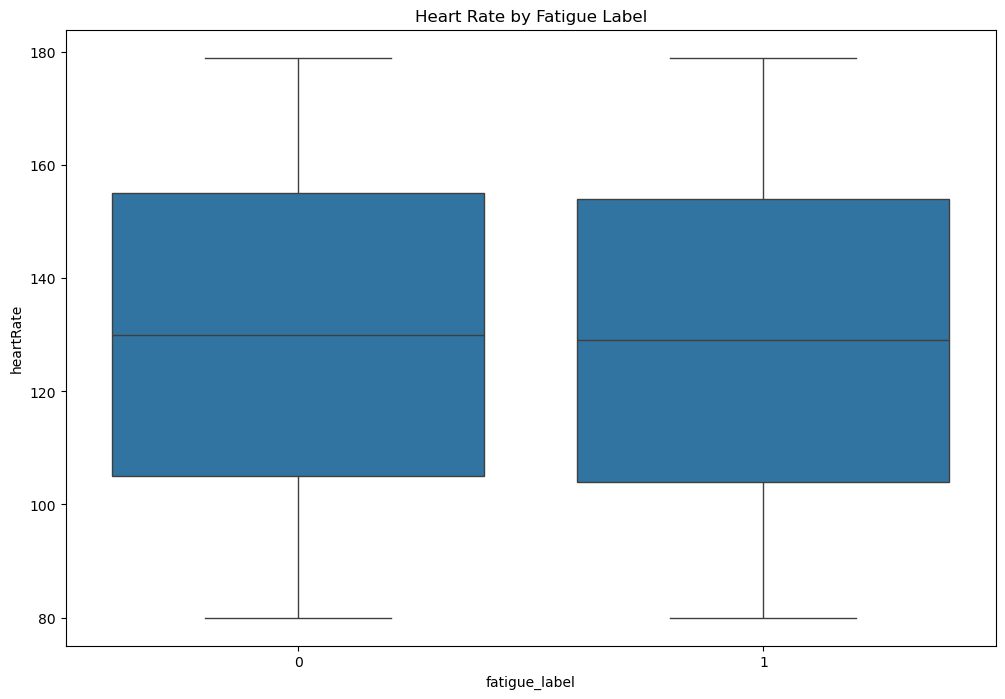

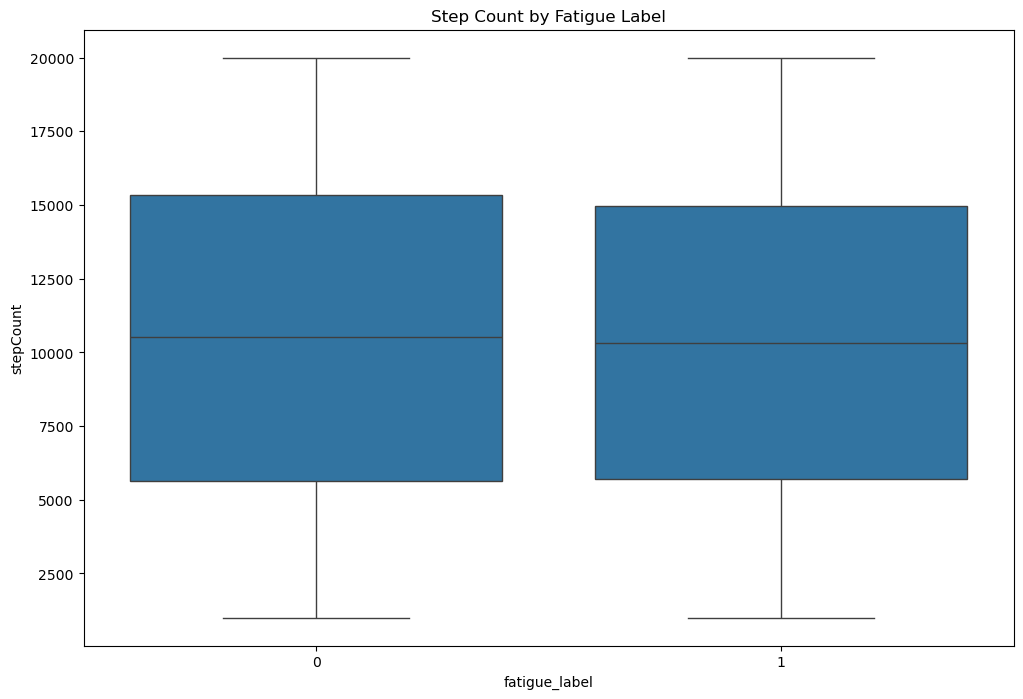

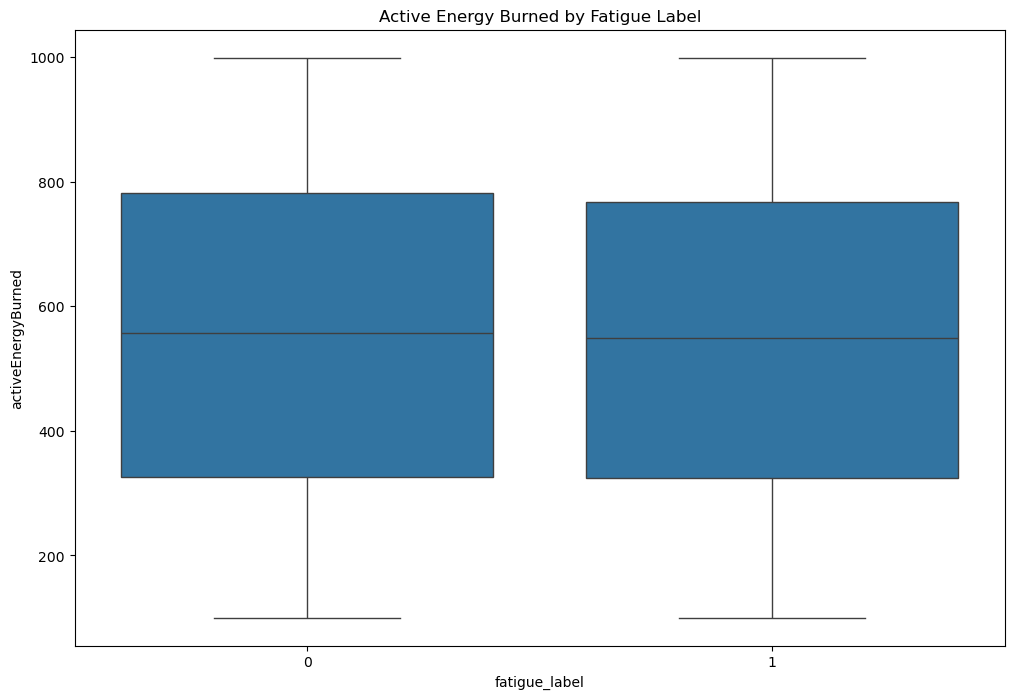

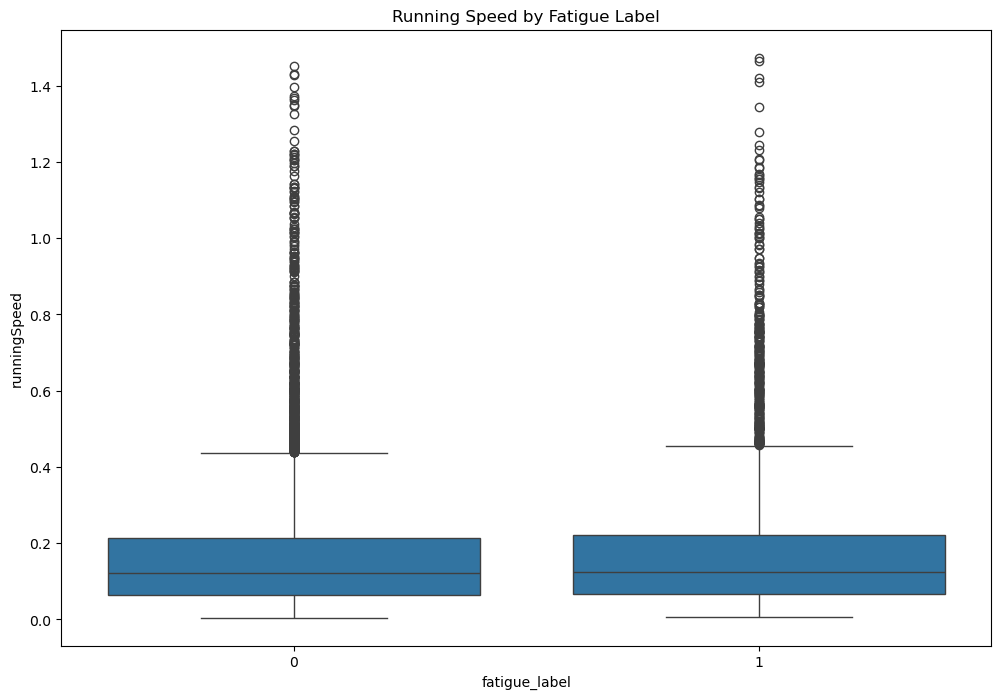

In [45]:
# 피로도 라벨에 따른 변수 분포
plt.figure(figsize=(12, 8))
sns.boxplot(x='fatigue_label', y='heartRate', data=d)
plt.title('Heart Rate by Fatigue Label')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='fatigue_label', y='stepCount', data=d)
plt.title('Step Count by Fatigue Label')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='fatigue_label', y='activeEnergyBurned', data=d)
plt.title('Active Energy Burned by Fatigue Label')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='fatigue_label', y='runningSpeed', data=d)
plt.title('Running Speed by Fatigue Label')
plt.show()


In [14]:
X = d.drop(columns=["fatigue_label"])
y = d["fatigue_label"]

In [15]:
X.shape

(10000, 4)

In [16]:
y.shape

(10000,)

In [17]:
d.to_csv(r"C:\Users\이수진\GitHub\SERVER_WAYVI\ai-server\datasets\processed\fatigue_dataset.csv", index=False)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [44]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

Confusion Matrix:
[[1240   96]
 [ 597   67]]

Classification Report:
              precision    recall  f1-score   support

           0     0.6750    0.9281    0.7816      1336
           1     0.4110    0.1009    0.1620       664

    accuracy                         0.6535      2000
   macro avg     0.5430    0.5145    0.4718      2000
weighted avg     0.5874    0.6535    0.5759      2000



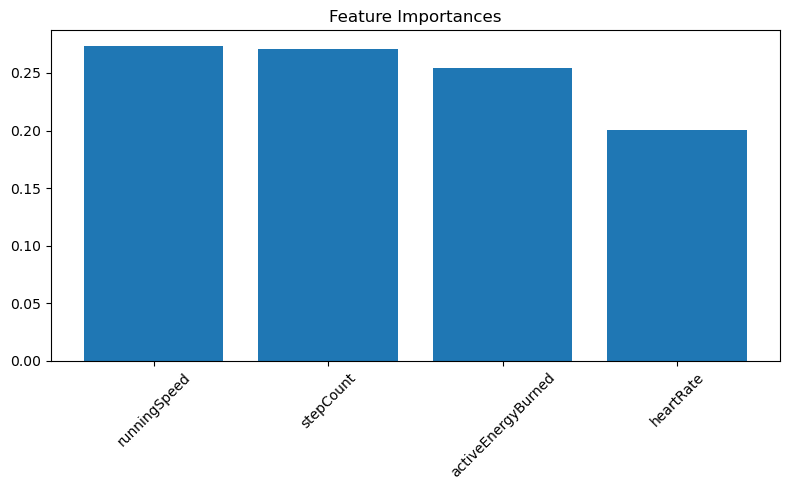

In [35]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(8, 5))
plt.title("Feature Importances")
plt.bar(range(len(features)), importances[indices], align='center')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


In [85]:
joblib.dump(model, "fatigue_detection_model.joblib")

['fatigue_detection_model.joblib']